# What is the least number of cars to reduce wait time below a certain threshold?
Sree & Gian

In [30]:
import pandas as pd

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

## Question
Our primary goal is to predict the mimimum number of cars needed to reduce the wait time below a certain threshold. With a rise in popularity of ridesharing systems in the world today, there comes greater waiting time for consumers. This result of increased demand is something many people have faced and will continue to face, making it an ever-prevalent issue. Being able to explore such a topic by modeling what happens in the real world could potentially take us on a path to address and better the issue of wait time.


## Model
We modeled the difference between average wait time between 2 different stations depending on the environment the simulations took place in and attempted to model the most efficient number of cars that would lower the amount of wait time for the passengers and the drivers. In our model, we particularly paid attention to the number of passengers that were at each station and how that affected the wait time. To make our model work but still keep it simple, we controlled the amount of drivers there were and the amount of passengers that had arrived at the station.

For the inputs, we assumed a certain distance and chance of people needing rides to simplify our model because in a real-life model, many of these numbers change based on the day of the week, time of day, and certain populations. 

We first calculated the difference in wait time between stops in the same environment to see if there were any major difference. In the model, we made the assumption that people were equally likely to get on at either station. We used arrays to assign cars a number and direction in order to keep track of where they were and if there were cars at any of the stations. We then ran several simulations to calculate the wait time for passengers and also to calculate what number of cars calculated the best possible solution to minimize wait time. 



In [31]:
def step (state, p, dist):
    
    if flip(p):
        state.station1 += 1
        state.totalpass += 1

    if flip(p):
        state.station2 += 1
        state.totalpass += 1

    for i in range(len(state.cars_array)):   # for each car
        if state.cars_array[i] == 0:      # if at s1, pickup pass and turn around
            if state.station1 > 0:
                state.station1 -= 1
            state.dir_array[i] *= -1
        elif state.cars_array[i] == dist-1:    # if at s2, pick up pass and turn around
            if state.station2 > 0:
                state.station2 -= 1
            state.dir_array[i] *= -1
        state.cars_array[i] += state.dir_array[i]  # new position of cars
        state.totalwait = state.station1 + state.station2



In [32]:
def makesystem(distance, numcars, p):
    cars_array = []
    dir_array = np.array([])
    
    for i in range(numcars):
        cars_array.append(i%distance)
        dir_array = np.append(i%2 - 1, dir_array)
        
    state = State(station1 = 5, station2 = 5, cars_array = cars_array, dir_array = dir_array, totalpass = 10, totalwait = 0)
    
    system = System(state = state, dist = distance, prob = p)
    return system

In [33]:
def run_simulation(system, duration):
    results1 = TimeSeries()
    results2 = TimeSeries()
    state = system.state

    for t in linrange(0, duration):
        step(state, system.prob, system.dist)

        results1[t] = state.station1
        results2[t] = state.station2
    
    avg_wait = state.totalwait / state.totalpass
    return results1, results2, avg_wait

In [34]:
rural = makesystem(30, 15, .05)
r_results1, r_results2, r_avg_wait = run_simulation(rural, 300)

In [35]:
urban = makesystem(20, 17, .1)
u_results1, u_results2, u_avg_wait = run_simulation(urban, 300)

0.0


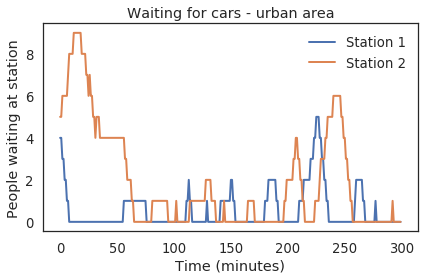

In [36]:
plot(u_results1, label = "Station 1")
plot(u_results2, label = "Station 2")
decorate(xlabel = "Time (minutes)",
        ylabel = "People waiting at station",
        title = "Waiting for cars - urban area")
print(u_avg_wait)

0.0


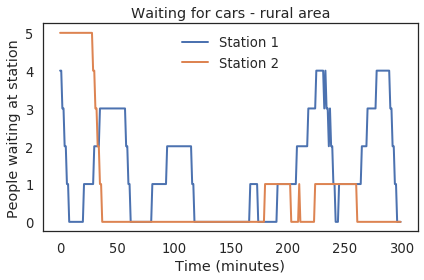

In [37]:
plot(r_results1, label = "Station 1")
plot(r_results2, label = "Station 2")
decorate(xlabel = "Time (minutes)",
        ylabel = "People waiting at station",
        title = "Waiting for cars - rural area")
print(r_avg_wait)

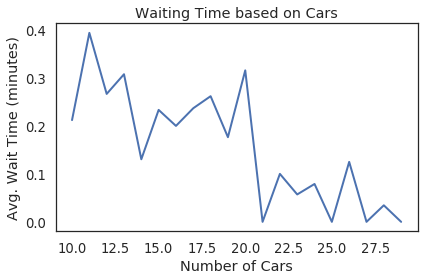

In [38]:
sweep = SweepSeries()
for c in linrange(10, 30):
    system = makesystem(20, c, .2)
    results1, results2, avg_wait = run_simulation(system, 60)
    sweep[c] = avg_wait
    
plot(sweep)
decorate(xlabel = "Number of Cars",
        ylabel = "Avg. Wait Time (minutes)",
        title = "Waiting Time based on Cars")


## Results
The first two graphs we produced represent the waiting times in urban and rural areas at each time over a span of five hours. Urban areas generally had a greater number of people waiting than in rural areas. In addition, we generated a plot of the average wait time versus the number of cars using a sweep. By looking at that graph, we are able to determine that generally, the greater the number of cars, the lower the average waiting time. This is reasonable when thinking of the real-world situation as well: you will not have to wait as long if you have more cars available to you. The metrics we recorded were the average wait time, the number of cars, and people waiting at each station.

## Interpretation
Based on the last graph of average waiting time versus number of cars, we can see that there seems to be a major decline in the average wait time between 17 and 20 cars. Therefore, we can potentially infer that the least number of cars needed to reduce wait time "below a certain threshold" is going to be around 17 to 20 cars. The shape of the graph seems reasonable enough to apply to the real world to some extent, though there are some limitations of the model. For example, we didn't take into account the rate of people arriving, as we assumed equal probabilities. This might deviate from what is expected in the real world, so this model is not entirely reliable.